# Import

In [72]:
import pandas as pd
import numpy as np
currrent = r"****\OneDrive\Documents\Data Sets\Excel Files\credit_card.csv")
data = pd.read_csv(current)

In [88]:
from sklearn.model_selection import train_test_split

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
import plotly.express as px

# Code

In [74]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [76]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [77]:
print(data.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [78]:
type1 = data.type.value_counts()

In [79]:
quantity = type1.values
transac = type1.index

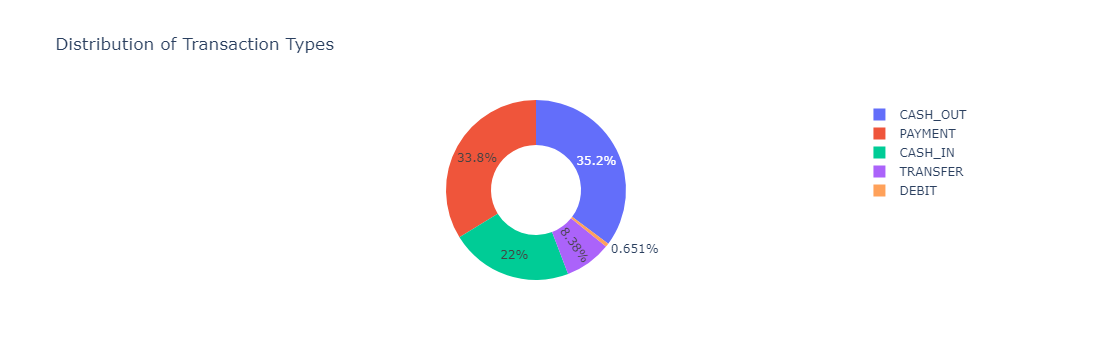

In [80]:
px.pie(data,values= quantity,names = transac, color = transac,hole=0.5,title = "Distribution of Transaction Types")

In [81]:
data_num = data.drop(["type","nameOrig","nameDest"],axis = 1)


In [82]:
data_num.corr()["isFraud"].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [107]:
def map_type(typename = None):
    type_map = {
        "CASH_OUT":1,
        "PAYMENT":2,
        "CASH_IN":3,
        "TRANSFER":4,
        "DEBIT":5
    }
    if typename != None:
        typename = typename.strip()
        typename = typename.upper()
        typename = typename.split(" ")
        typename = "_".join(typename)
        if typename not in type_map.keys():
            raise Exception("Value Not Found")
        else:   
            return type_map[typename]
    return type_map
    

In [84]:
data["type"] = data["type"].map(map_type())

In [85]:
data["isFraud"] = data["isFraud"].map({0:"No Fraud",1:"Fraud"})

In [87]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


In [90]:
x = np.array(data[["type","amount","oldbalanceOrg","newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [91]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=1241223,test_size=0.1)

In [93]:
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [114]:
f"the accuracy of the model is || {model.score(xtest,ytest)*100:.2f}% ||"

'the accuracy of the model is || 99.97% ||'

In [110]:
print("[ Cash out, Cash in, transfer, payment, debit]")
type_mode = input("Input the type of transaction made: ")
amount = float(input("Enter the amount: "))
old = float(input("Enter the Balance before the transaction: "))
new = float(input("Enter the Balance after the transaction: "))
features = np.array([[map_type(type_mode),amount,old,new]])
print(f"The Transaction was a || {model.predict(features)[0]} ||")

[ Cash out, Cash in, transfer, payment, debit]
Input the type of transaction made: cash in 
Enter the amount: 9000
Enter the Balance before the transaction: 9000
Enter the Balance after the transaction: 0
The Transaction was a || No Fraud ||
